In [38]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [39]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Data_LB\Deep Learning\Data\Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [40]:
df.drop("Unnamed: 0",axis=1, inplace= True)

In [41]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [42]:
#Missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [44]:
#duplicates
df.duplicated().sum()

0

In [45]:
x = df.drop('Sales',axis=1)
y = df['Sales']

In [46]:
#train test split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 20)


In [47]:
print(f"The shape of x_train: {x_train.shape}")
print(f"The shape of x_test: {x_test.shape}")
print(f"The shape of y_train: {y_train.shape}")
print(f"The shape of y_test: {y_test.shape}")

The shape of x_train: (160, 3)
The shape of x_test: (40, 3)
The shape of y_train: (160,)
The shape of y_test: (40,)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


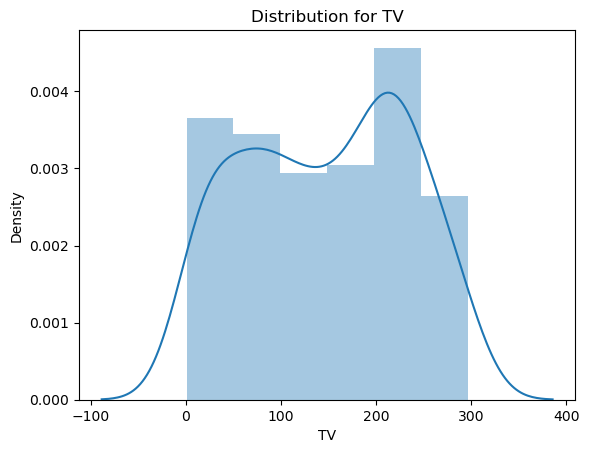

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


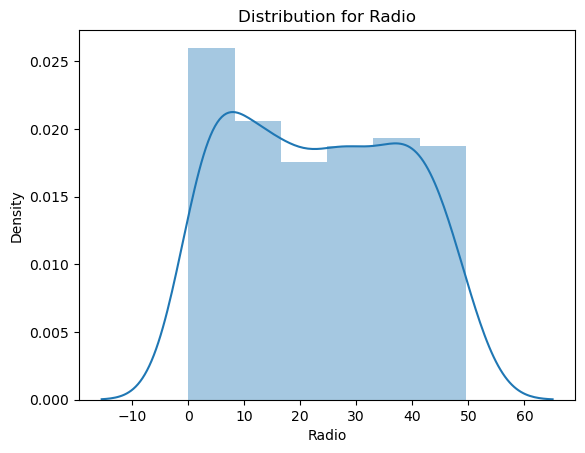

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


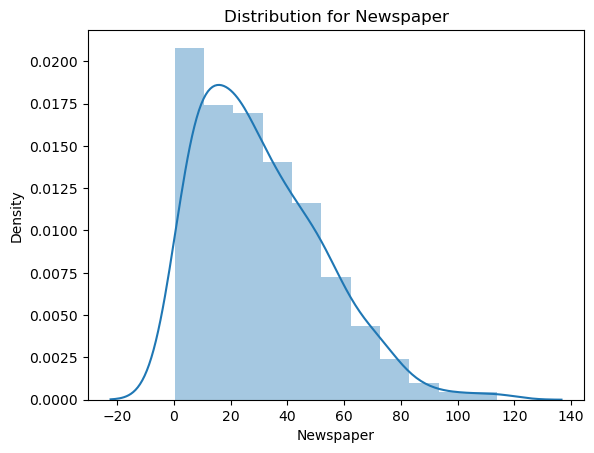

In [48]:
for col in x_train.columns:
    
    sns.distplot(df[col], kde = True)
    plt.title(f'Distribution for {col}')
    plt.show()

None of them are following normal distrubtions

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


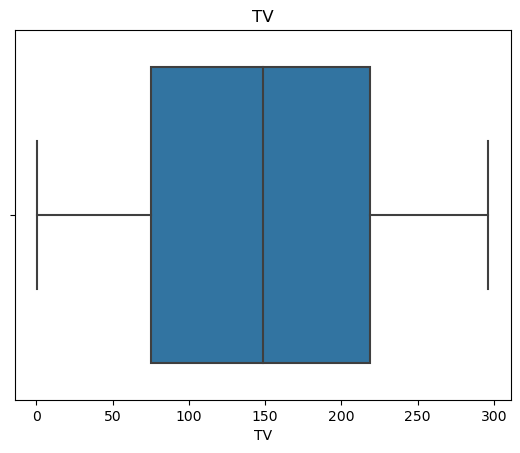

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


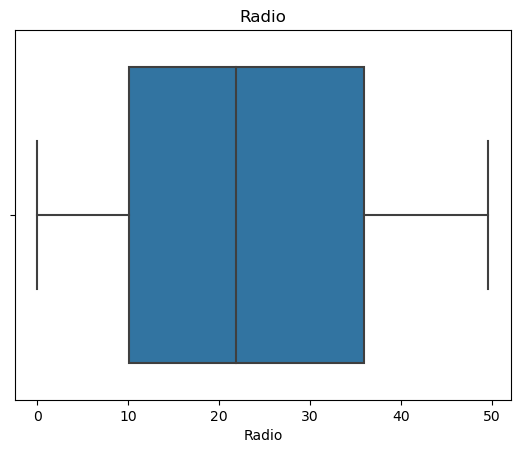

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


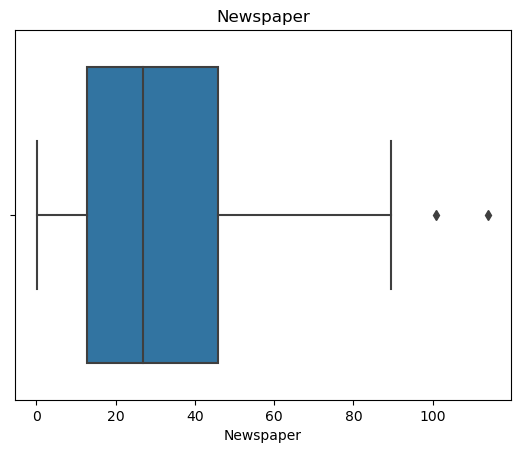

In [49]:
#checking for outliers
for col in x_train.columns:
    sns.boxplot(x_train[col],orient="h")
    plt.title(f'{col}')
    plt.show()

In [50]:
#removing outliers from newspaper column
q1 = x_train['Newspaper'].quantile(0.25)
q3 = x_train['Newspaper'].quantile(0.75)
iqr = q3-q1
iqr

33.0

In [51]:
uw = q3+1.5*iqr     #upper whisker
lw = q1-1.5*iqr   #lower whisker

In [52]:
uw, lw

(95.25, -36.75)

In [53]:
train_out_index = x_train[(x_train['Newspaper'] >uw) |(x_train['Newspaper']<lw)].index
test_out_index = x_test[(x_test['Newspaper']>uw) |(x_test['Newspaper']<lw)].index

In [54]:
train_out_index,test_out_index


(Int64Index([101, 16], dtype='int64'), Int64Index([], dtype='int64'))

In [55]:
x_train.drop(index=[train_out_index],inplace = True)
x_test.drop(index=[test_out_index],inplace = True)

KeyError: '[(101, 16)] not found in axis'

In [56]:
y_train.drop(index=[train_out_index],inplace = True)
y_test.drop(index=[test_out_index],inplace = True)

KeyError: '[(101, 16)] not found in axis'

In [98]:
 import os

import random

def set_seed(seed: int= 42):

    np.random.seed(seed)

    tf.random.set_seed(seed)

    tf.experimental.numpy.random.seed(seed)

#When running on the Cube backend, two further options must be set

os.environ["TF_CU_DETERMINISTIC"] = '1'

os.environ["TF_DETERMINISTIC_OPS"] = '1'

# Set a fixed value for the hash seed os.environ("PYTHONHASHSEED"]= str(seed)

print("Random seed set as (seed}")



Random seed set as (seed}


In [99]:
#Scaling
#standard scaler shift mean to 0 and std deviation to 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scale = pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test_scale = pd.DataFrame(scaler.fit_transform(x_test),columns=x_test.columns)

In [100]:
set_seed(3)

#model creation

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (3,)),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear'),
])

#model compile
model.compile(
    loss = "mse",
    optimizer = 'adam'
)

#model.fit
history = model.fit(x_train,y_train,validation_data = [x_test,y_test], epochs =300)

Epoch 1/300
5/5 [==============================] - 1s 63ms/step - loss: 2580.6421 - val_loss: 2291.5955
Epoch 2/300
5/5 [==============================] - 0s 17ms/step - loss: 2123.2700 - val_loss: 1886.1902
Epoch 3/300
5/5 [==============================] - 0s 15ms/step - loss: 1741.7399 - val_loss: 1538.9165
Epoch 4/300
5/5 [==============================] - 0s 15ms/step - loss: 1422.3372 - val_loss: 1243.9490
Epoch 5/300
5/5 [==============================] - 0s 16ms/step - loss: 1152.1836 - val_loss: 997.8647
Epoch 6/300
5/5 [==============================] - 0s 17ms/step - loss: 923.4097 - val_loss: 798.0438
Epoch 7/300
5/5 [==============================] - 0s 14ms/step - loss: 742.8354 - val_loss: 640.8138
Epoch 8/300
5/5 [==============================] - 0s 15ms/step - loss: 599.7503 - val_loss: 518.8063
Epoch 9/300
5/5 [==============================] - 0s 16ms/step - loss: 489.5359 - val_loss: 424.2255
Epoch 10/300
5/5 [==============================] - 0s 15ms/step - loss: 

5/5 [==============================] - 0s 19ms/step - loss: 3.8555 - val_loss: 2.9212
Epoch 83/300
5/5 [==============================] - 0s 18ms/step - loss: 3.7470 - val_loss: 2.8144
Epoch 84/300
5/5 [==============================] - 0s 18ms/step - loss: 3.6925 - val_loss: 2.7443
Epoch 85/300
5/5 [==============================] - 0s 20ms/step - loss: 3.6116 - val_loss: 2.7240
Epoch 86/300
5/5 [==============================] - 0s 21ms/step - loss: 3.5765 - val_loss: 2.6819
Epoch 87/300
5/5 [==============================] - 0s 17ms/step - loss: 3.5255 - val_loss: 2.6118
Epoch 88/300
5/5 [==============================] - 0s 15ms/step - loss: 3.5139 - val_loss: 2.5770
Epoch 89/300
5/5 [==============================] - 0s 14ms/step - loss: 3.4382 - val_loss: 2.5759
Epoch 90/300
5/5 [==============================] - 0s 13ms/step - loss: 3.4126 - val_loss: 2.5297
Epoch 91/300
5/5 [==============================] - 0s 16ms/step - loss: 3.3706 - val_loss: 2.5171
Epoch 92/300
5/5 [=====

5/5 [==============================] - 0s 15ms/step - loss: 2.5813 - val_loss: 2.0541
Epoch 165/300
5/5 [==============================] - 0s 15ms/step - loss: 2.6089 - val_loss: 2.0650
Epoch 166/300
5/5 [==============================] - 0s 13ms/step - loss: 2.5550 - val_loss: 2.0454
Epoch 167/300
5/5 [==============================] - 0s 14ms/step - loss: 2.6023 - val_loss: 2.0811
Epoch 168/300
5/5 [==============================] - 0s 14ms/step - loss: 2.5433 - val_loss: 2.0251
Epoch 169/300
5/5 [==============================] - 0s 13ms/step - loss: 2.5256 - val_loss: 2.0165
Epoch 170/300
5/5 [==============================] - 0s 15ms/step - loss: 2.4873 - val_loss: 2.0469
Epoch 171/300
5/5 [==============================] - 0s 17ms/step - loss: 2.5114 - val_loss: 2.0315
Epoch 172/300
5/5 [==============================] - 0s 19ms/step - loss: 2.5056 - val_loss: 2.0150
Epoch 173/300
5/5 [==============================] - 0s 18ms/step - loss: 2.4892 - val_loss: 2.0042
Epoch 174/300


5/5 [==============================] - 0s 16ms/step - loss: 2.1677 - val_loss: 1.8226
Epoch 247/300
5/5 [==============================] - 0s 16ms/step - loss: 2.1586 - val_loss: 1.8576
Epoch 248/300
5/5 [==============================] - 0s 15ms/step - loss: 2.1494 - val_loss: 1.8059
Epoch 249/300
5/5 [==============================] - 0s 14ms/step - loss: 2.1500 - val_loss: 1.7973
Epoch 250/300
5/5 [==============================] - 0s 14ms/step - loss: 2.1387 - val_loss: 1.8515
Epoch 251/300
5/5 [==============================] - 0s 15ms/step - loss: 2.1561 - val_loss: 1.7962
Epoch 252/300
5/5 [==============================] - 0s 15ms/step - loss: 2.1338 - val_loss: 1.8082
Epoch 253/300
5/5 [==============================] - 0s 14ms/step - loss: 2.1229 - val_loss: 1.7941
Epoch 254/300
5/5 [==============================] - 0s 16ms/step - loss: 2.1154 - val_loss: 1.8000
Epoch 255/300
5/5 [==============================] - 0s 15ms/step - loss: 2.1178 - val_loss: 1.8082
Epoch 256/300


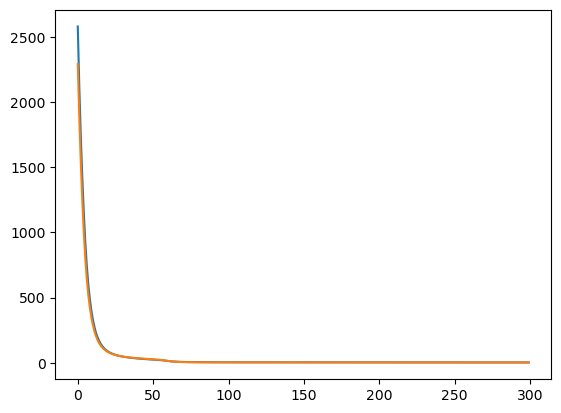

In [103]:
plt.plot(pd.DataFrame(history.history))